# Execute the code below
You will get a passenger list of the titanic.

In [3]:
import pandas as pd

In [4]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns? 

In [5]:
# What are the "type" of each column? 

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


There 3 non-numeric columns.

Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

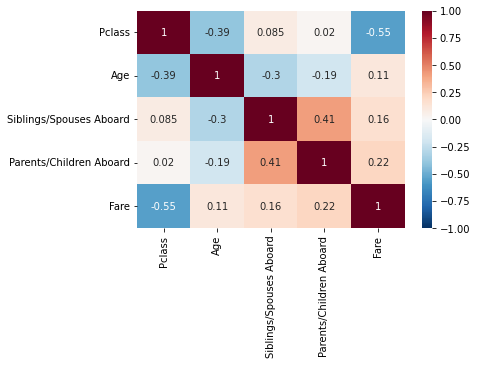

In [6]:
# First exploration:

import seaborn as sns
import matplotlib.pyplot as plt


corr = df_titanic.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, vmin=-1, vmax=1)
plt.show()


You are looking for Jack. How many people named Jack on board?

In [7]:
# How many people named Jack on board?

# Create a boolean mask indicating which rows contain the string 'Jack' in the 'Name' column
mask = df_titanic['Name'].str.contains('Jack')

# Use the mask to count the number of people named Jack
num_people_named_jack = mask.sum()

print(num_people_named_jack)

1


# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers. 
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die. 

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [8]:
# It's up to you:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df = df_titanic.loc[:, df_titanic.columns != 'Survived']
X = df.loc[:, df.select_dtypes(exclude=['object']).columns.tolist()]
y = df_titanic[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36)

# We train the model
model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

# generate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)


print("accuracy score on train set:",model.score(X_train, y_train))
print("accuracy score on test set:",model.score(X_test, y_test))
print(confusion_matrix)
print("number of iterations taken to fit the model:",model.n_iter_)
print("model order:",model.classes_)

accuracy score on train set: 0.718796992481203
accuracy score on test set: 0.6441441441441441
[[109  20]
 [ 59  34]]
number of iterations taken to fit the model: [55]
model order: ['Dead' 'Survived']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [9]:
# It's up to you to save everybody:

df = df_titanic.loc[:, df_titanic.columns != 'Survived']
X = df.loc[:, df.select_dtypes(exclude=['object']).columns.tolist()]
y = df_titanic[['Survived']]

X_train, X_testNew, y_train, y_testNew = train_test_split(X, y, random_state = 36)


# Create a Logistic Regression model with the new class weights
modelnew = LogisticRegression(class_weight= {'Survived': 1, 'Dead': 10})

# Fit the model on the training data
modelnew.fit(X_train, y_train)

# Print accuracy scores on the train and test sets
print("accuracy score on train set:", modelnew.score(X_train, y_train))
print("accuracy score on test set:", modelnew.score(X_testNew, y_testNew))
print("number of iterations taken to fit the model:",modelnew.n_iter_)




accuracy score on train set: 0.6300751879699248
accuracy score on test set: 0.5900900900900901
number of iterations taken to fit the model: [75]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Generate and print the confusion matrix on the test set
y_predict = modelnew.predict(X_testNew)
cfm = confusion_matrix(y_testNew, y_predict)
print(cfm)


TypeError: ignored

# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [11]:
# It's up to you:

modelnew.predict_proba(X_test.iloc[:5,:])

array([[0.90912458, 0.09087542],
       [0.98167958, 0.01832042],
       [0.96599843, 0.03400157],
       [0.90451778, 0.09548222],
       [0.98384237, 0.01615763]])

In [12]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# split data into features and target
X = df_titanic.drop("Survived", axis=1)
y = df_titanic["Survived"]

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model pipeline
model_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier())
])

# define the hyperparameter grid for grid search
param_grid = {
    "clf__n_estimators": [10, 20, 30],
    "clf__max_depth": [5, 10, 15]
}

# create the grid search object
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5)

# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# predict probabilities of survival for the test set
probabilities = grid_search.predict_proba(X_test)

# sort the probabilities and index into the original data frame to display the passenger information
sorted_probs = probabilities[:, 1].argsort()[::-1]
passenger_info = df.iloc[sorted_probs]
print(passenger_info)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-packages/

ValueError: ignored

# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [ ]:
# It's up to you:


# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?
